In [1]:
import threeplayers_v2 as ppp
import twoplayers as pp
import utility as util

import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from numba import jit
import numba as nb
from IPython.display import clear_output
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter

In [2]:
# set fineness of price grid
k = 12

# plot profitability 2 players
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 1000
prices = np.linspace(0, 1, k+1)
num_calcs = int(T/1000-1)
summed_avg_profitabilities = np.zeros(num_calcs)

for n in range(0, N):
    p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
    per_firm_profit = np.sum([avg_profs1, avg_profs2], axis=0)/2
    summed_avg_profitabilities = np.sum([summed_avg_profitabilities, per_firm_profit], axis=0)
    
avg_avg_profitabilities = np.divide(summed_avg_profitabilities, N)
    
fig, axs = plt.subplots(1, 1, figsize=(9,3))
fig.suptitle("Average 2-player per-firm profitability in {} different runs, k={}".format(N, k))
axs.set_xlabel("t")
axs.set_ylabel("Joint profitability")

xs = np.linspace(0, T, num_calcs)

# compute competitive benchmark profitabilities
benchprices2 = prices[:int(prices.size/2)+2]
bench2 = util.benchmark_two_player(benchprices2)

axs.set_ylim(0.04, 0.125+(0.125*0.05))

axs.plot(xs, avg_avg_profitabilities, color="steelblue", label = "avg. profitability")
axs.plot(xs, [0.125]*len(xs), color='black', label='joint-profit maximizing', linestyle='dashed')
axs.plot(xs, [bench2]*len(xs), color='grey', label='competitive benchmark', linestyle='dashed')
#axs.xaxis.set_major_locator(ticker.MultipleLocator(1))
axs.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
fig.tight_layout()
plt.legend()
plt.savefig("figures/profitability2player_k%s.png"%k)

# plot profitability 3 players
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 1000
prices = np.linspace(0, 1, k+1)
num_calcs = int(T/1000-1)
summed_avg_profitabilities = np.zeros(num_calcs)

for n in range(0, N):
    p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
    per_firm_profit = np.sum([avg_profs1, avg_profs2, avg_profs3], axis=0)/3
    summed_avg_profitabilities = np.sum([summed_avg_profitabilities, per_firm_profit], axis=0)
    
avg_avg_profitabilities = np.divide(summed_avg_profitabilities, N)
    
fig, axs = plt.subplots(1, 1, figsize=(9,3))

fig.suptitle("Average 3-player per-firm profitability in {} different runs, k={}".format(N, k))
axs.set_xlabel("t")
axs.set_ylabel("Joint profitability")

xs = np.linspace(0, T, num_calcs)

# compute competitive benchmark profitabilities
benchprices3 = prices[:int(prices.size/2)+3]
bench3 = util.benchmark_three_player(benchprices3)

axs.set_ylim(0.0, 0.08333+(0.08333*0.05))
axs.plot(xs, avg_avg_profitabilities, color="steelblue", label = "avg. profitability")
axs.plot(xs, [0.08333]*len(xs), color='black', label='joint-profit maximizing', linestyle='dashed')
axs.plot(xs, [bench3]*len(xs), color='grey', label='competitive benchmark', linestyle='dashed')
#axs.xaxis.set_major_locator(ticker.MultipleLocator(1))
axs.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
fig.tight_layout()
plt.legend()
plt.savefig("figures/profitability3player_k%s.png"%k)

def plot_complicity():
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 100
    prices = np.linspace(0, 1, k+1)
    num_calcs = int(T/12500-1)
    summed_avg_profitabilities_three = np.zeros(num_calcs)
    summed_avg_profitabilities_two = np.zeros(num_calcs)

    for n in range(0, N):
        p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
        per_firm_profit = np.sum([avg_profs1, avg_profs2, avg_profs3], axis=0)/3
        summed_avg_profitabilities_three = np.sum([summed_avg_profitabilities_three, per_firm_profit], axis=0)

        p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
        per_firm_profit = np.sum([avg_profs1, avg_profs2], axis=0)/2
        summed_avg_profitabilities_two = np.sum([summed_avg_profitabilities_two, per_firm_profit], axis=0)

    avg_avg_profitabilities_three = np.divide(summed_avg_profitabilities_three, N)
    avg_complicities_three = np.divide(avg_avg_profitabilities_three, 0.08333)

    avg_avg_profitabilities_two = np.divide(summed_avg_profitabilities_two, N)
    avg_complicities_two = np.divide(avg_avg_profitabilities_two, 0.125)

    fig, axs = plt.subplots(1)
    fig.suptitle("Avg. per-firm complicity ($\Delta$) in 100 different simulations (500000 runs each), k=%s"%k)
    fig.set_figheight(6)
    fig.set_figwidth(9)
    axs.set_xlabel("t")
    axs.set_ylabel("Complicity")
    axs.set_ylim(0, 1)
    xs = np.linspace(0, T, num_calcs)
    axs.plot(xs, avg_complicities_three, color="grey", label = "average complicity, three players", marker='o')
    axs.plot(xs, avg_complicities_two, color="black", label = "average complicity, two players", marker='o')
    #axs.plot(xs, [0.08333]*len(xs), color='orange', label='joint-profit maximizing', linestyle='dashed')
    
    # compute competitive benchmark profitabilities
    benchprices2 = prices[:int(prices.size/2)+2]
    benchprices3 = prices[:int(prices.size/2)+3]
    
    bench2 = util.benchmark_two_player(benchprices2)
    bench3 = util.benchmark_three_player(benchprices3)
    
    axs.plot(xs, [bench2/0.125]*len(xs), color='black', label='competitive benchmark, two players', linestyle='dashed')
    axs.plot(xs, [bench3/0.08333]*len(xs), color='grey', label='competitive benchmark, three players', linestyle='dashed')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    #axs.xaxis.set_major_locator(ticker.MultipleLocator(1))
    #axs.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    #fig.tight_layout()
    plt.legend(loc='lower right')
    #plt.show()
    plt.savefig("figures/complicity_number_of_firms_k%s.png"%k)

plot_complicity()

## useless plots, we will not use these
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10
prices = np.linspace(0, 1, 7)
num_calcs = int(T/12500-1)
variances2 = np.zeros(num_calcs)
variances3 = np.zeros(num_calcs)
fig, axs = plt.subplots(N, figsize=(8,29))
for n in range(0, N):
    p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
    
    # compute rolling avg price variance over time
    for i in range(0, T, 12500):
        if i >= 12500:
            var0 = np.var(p_table[0, i-1000:i])
            var1 = np.var(p_table[1, i-1000:i])
            avg_var = np.mean([var0, var1])
            variances2[int(i/12500)-1] = avg_var
        else:
            pass
    p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
    for i in range(0, T, 12500):
        if i >= 12500:
            var0 = np.var(p_table[0, i-1000:i])
            var1 = np.var(p_table[1, i-1000:i])
            var2 = np.var(p_table[2, i-1000:i])
            avg_var = np.mean([var0, var1, var2])
            variances3[int(i/12500)-1] = avg_var
        else:
            pass
    fig.suptitle("Average variance in price over time")
    #fig.set_figheight(6)
    #fig.set_figwidth(9)
    axs[n].set_xlabel("t")
    axs[n].set_ylabel("Price variance")
    xs = np.linspace(0, T, num_calcs)
    axs[n].plot(xs, variances2, color="grey", label = "two players", marker='o')
    axs[n].plot(xs, variances3, color="black", label = "three players", marker='o')
    axs[n].legend(loc='upper right')
fig.tight_layout()
plt.show()

for k in [6, 12, 24, 48]:
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 100
    prices = np.linspace(0, 1, k+1)
    num_calcs = int(T/12500-1)

    cycle2 = 0
    fixed2 = 0
    cycle3 = 0
    fixed3 = 0

    for n in range(0, N):
        p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
        var0 = np.var(p_table[0, -1000:])
        var1 = np.var(p_table[1, -1000:])
        avg_var = np.mean([var0, var1])
        if abs(avg_var - 0) < 0.01:
            fixed2 += 1
        else:
            cycle2 += 1

        p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
        var0 = np.var(p_table[0, -1000:])
        var1 = np.var(p_table[1, -1000:])
        var2 = np.var(p_table[2, -1000:])
        avg_var = np.mean([var0, var1, var2])
        if abs(avg_var - 0) < 0.01:
            fixed3 += 1
        else:
            cycle3 += 1

    fig, axs = plt.subplots(1, 2)
    fig.suptitle("End-game strategy outcomes, k={} ({} runs)".format(k, N))
    strats = ['fixed price','varying prices']
    outcomes = [fixed2, cycle2]
    axs[0].set_xlabel("Strategy outcome, two players")
    axs[0].set_ylabel("Frequency")
    axs[0].set_ylim(0, N)
    axs[0].bar(strats, outcomes)
    #axs[0].legend(loc='upper right')

    outcomes = [fixed3, cycle3]
    axs[1].set_xlabel("Strategy outcome, three players")
    axs[1].set_ylabel("Frequency")
    axs[1].set_ylim(0, N)
    axs[1].bar(strats, outcomes)
    #axs[1].legend(loc='upper right')

    fig.tight_layout()
    #plt.show()
    plt.savefig("figures/strategyoutcomes_k%s"%k)

## Price cycles 2 and 3 players
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10
prices = np.linspace(0, 1, k+1)
num_calcs = int(T/12500-1)

cycle2 = 0
fixed2 = 0
cycle3 = 0
fixed3 = 0


for n in range(0, N):
    p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
    
    # grab section of last 50 prices for inspection
    p0s2d = p_table[0, 499950:500000]
    p1s2d = p_table[1, 499950:500000]
        
    p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
    
    # grab section of last 100 prices for inspection
    p0s3d = p_table[0, 499900:500000]
    p1s3d = p_table[1, 499900:500000]
    p2s3d = p_table[2, 499900:500000]
    
fig, axs = plt.subplots(2, 1, figsize=(9, 4), constrained_layout=True)
fig.suptitle("Price history close to termination, k=%s"%k)

p0s2d = p0s2d[np.arange(0, p0s2d.size, 2)][:-1]
p1s2d = p1s2d[np.arange(1, p1s2d.size, 2)][:-1]

axs[0].set_xlabel("t")
axs[0].set_ylabel("price")
axs[0].plot(range(0, 48, 2), p0s2d , label="firm 0 prices", marker="^",linestyle="dotted")
axs[0].plot(range(1, 48, 2), p1s2d, label="firm 1 prices", marker="^", color="orange", linestyle="dotted")
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

p0s3d = p0s3d[np.arange(0, p0s3d.size, 3)][:-1]
p1s3d = p1s3d[np.arange(1, p1s3d.size, 3)][:-1]
p2s3d = p2s3d[np.arange(2, p2s3d.size, 3)][:-1]

axs[1].set_xlabel("t")
axs[1].set_ylabel("price")
axs[1].plot(range(0, 98, 3), p0s3d , label="firm 0 prices", marker="^", linestyle="dotted")
axs[1].plot(range(1, 96, 3), p1s3d, label="firm 1 prices", marker="^", color="orange", linestyle="dotted")
axs[1].plot(range(2, 96, 3), p2s3d, label="firm 2 prices", marker="^", color="green", linestyle="dotted")
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

#fig.tight_layout()
#plt.show()
plt.savefig("figures/pricehistories_k%s.png"%k)

fig, axs = plt.subplots(2, 1, figsize=(9, 4), constrained_layout=True)
fig.suptitle("Price history close to termination, k=%s"%k)

axs[0].set_xlabel("t")
axs[0].set_ylabel("price")
axs[0].plot(range(0, 48, 2), p0s2d , label="firm 0 prices", marker="^",linestyle="dotted")
axs[0].plot(range(1, 48, 2), p1s2d, label="firm 1 prices", marker="^", color="orange", linestyle="dotted")
# Put a legend to the right of the current axis
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axs[1].set_xlabel("t")
axs[1].set_ylabel("price")
axs[1].plot(range(0, 48, 3), p0s3d , label="firm 0 prices", marker="^", linestyle="dotted")
axs[1].plot(range(1, 48, 3), p1s3d, label="firm 1 prices", marker="^", color="orange", linestyle="dotted")
axs[1].plot(range(2, 48, 3), p2s3d, label="firm 2 prices", marker="^", color="green", linestyle="dotted")

# Put a legend to the right of the current axis
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.subplots_adjust(bottom=0.25, top=0.75,)
#plt.show()
plt.savefig("figures/pricehistories_k%s.png"%k) 

Average 30-period pre-deviation profit is:  3.571975047080983
Average 30-period profit including deviation:  3.111169962335219


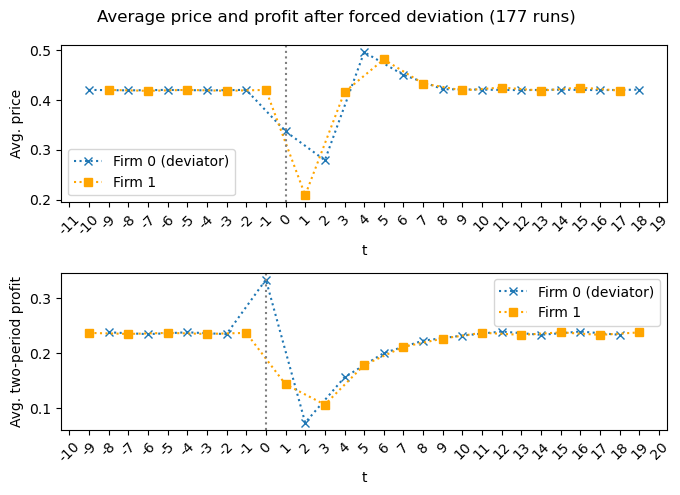

In [3]:
# FORCED DEVIATION 2 PLAYERS
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 1000
prices = np.linspace(0, 1, 13)

avg_p_0s = np.zeros(30)
avg_p_1s = np.zeros(30)
avg_prof0s = np.zeros(30)
avg_prof1s = np.zeros(30)
ctr = 0 # counts number of fixed-price strategy runs
for n in range(0, N):
    p_table, avg_profs0, avg_profs1 = pp.bertrand_simulation_forced_deviation(alpha, delta, T, prices)
    lastps0 = p_table[0, -1000:]
    lastps1 = p_table[1, -1000:]
    var0 = np.var(lastps0[:800])
    var1 = np.var(lastps1[:800])
    avg_var = np.mean([var0, var1])
    
    if abs(avg_var - 0) > 0.01: 
        """
        If the variance in the prices prior to the deviation was too high, we were in a price cycle,
        but since we only want to observe fixed price strategy deviations, we must discard this run.
        """
        continue
    p_0s = p_table[0, 499890:499920] # firm 0 prices before and after deviation
    p_1s = p_table[1, 499890:499920] # firm 1 prices before and after deviation
    # compute profits for each price
    prof0s = [pp.profit(p0t, p1t) for p0t, p1t in zip(p_0s, p_1s)]
    prof1s = [pp.profit(p1t, p0t) for p0t, p1t in zip(p_0s, p_1s)]
    
    avg_p_0s = np.sum([avg_p_0s, p_0s], axis = 0)
    avg_p_1s = np.sum([avg_p_1s, p_1s], axis = 0)
    
    avg_prof0s = np.sum([avg_prof0s, prof0s], axis = 0)
    avg_prof1s = np.sum([avg_prof1s, prof1s], axis = 0)
    
    ctr += 1
# divide all price and profits arrays by number of fixed-price strategy runs
avg_p_0s = np.divide(avg_p_0s, ctr)
avg_p_1s = np.divide(avg_p_1s, ctr)
avg_prof0s = np.divide(avg_prof0s, ctr)
avg_prof1s = np.divide(avg_prof1s, ctr)

fig, axs = plt.subplots(2, 1, figsize=(7, 5))
fig.suptitle("Average price and profit after forced deviation (%s runs)"%ctr)

# reduce price arrays to only contain prices where the firm is able to set the price
avg_p_0s = np.delete(avg_p_0s, np.arange(0, avg_p_0s.size, 2))
avg_p_1s = np.delete(avg_p_1s, np.arange(1, avg_p_1s.size, 2))[1:]

axs[0].set_xlabel("t")
axs[0].set_ylabel("Avg. price")
axs[0].plot(range(-10, 20, 2), avg_p_0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[0].plot(range(-9, 19, 2), avg_p_1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
axs[0].axvline(x = 0, color = 'grey', linestyle='dotted')

axs[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[0].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
for tick in axs[0].get_xticklabels():
    tick.set_rotation(45)

axs[0].legend()

# reduce profit arrays into two-period profits
avg_prof0s = np.add.reduceat(avg_prof0s, np.arange(1, avg_prof0s.size, 2))[:-1]
avg_prof1s = np.add.reduceat(avg_prof1s, np.arange(0, avg_prof1s.size, 2))

# compute sums of profits for each firm. Was there anything to gain from the deviation?

# pre-deviation profits (profits deviator would have gotten)
pre_total_prof0 = np.sum(avg_prof0s[0]) * 15 # profit for 30 periods, since we just reduced to two-period profits
pre_total_prof1 = np.sum(avg_prof1s[0]) * 15

# post-deviation profits
post_total_prof0 = np.sum(avg_prof0s)
post_total_prof1 = np.sum(avg_prof1s)

axs[1].set_xlabel("t")
axs[1].set_ylabel("Avg. two-period profit")
axs[1].plot(range(-8, 20, 2), avg_prof0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[1].plot(range(-9, 21, 2), avg_prof1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
#axs[1].annotate("pre-deviation 30-period profit: %s"%pre_total_prof0, (-8, avg_prof0s[0]))
#axs[1].annotate("post-deviation 30-period profit: %s"%post_total_prof0, (20, avg_prof0s[-1]))
axs[1].axvline(x = 0, color = 'grey', linestyle='dotted')
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[1].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
for tick in axs[1].get_xticklabels():
    tick.set_rotation(45)
axs[1].legend()

print("Average 30-period pre-deviation profit is: ", pre_total_prof0)
print("Average 30-period profit including deviation: ", post_total_prof0)

fig.tight_layout()
#plt.show()
plt.savefig("figures/forced_deviation2.png")

# FORCED DEVIATION 2 PLAYERS
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 1000
prices = np.linspace(0, 1, 13)

avg_p_0s = np.zeros(22)
avg_p_1s = np.zeros(22)
avg_prof0s = np.zeros(22)
avg_prof1s = np.zeros(22)
ctr = 0 # counts number of fixed-price strategy runs
for n in range(0, N):
    p_table, avg_profs0, avg_profs1 = pp.bertrand_simulation_forced_deviation(alpha, delta, T, prices)
    lastps0 = p_table[0, -1000:]
    lastps1 = p_table[1, -1000:]
    var0 = np.var(lastps0[:800])
    var1 = np.var(lastps1[:800])
    avg_var = np.mean([var0, var1])
    
    if abs(avg_var - 0) > 0.01: 
        """
        If the variance in the prices prior to the deviation was too high, we were in a price cycle,
        but since we only want to observe fixed price strategy deviations, we must discard this run.
        """
        continue
    p_0s = p_table[0, 499894:499916] # firm 0 prices before and after deviation
    p_1s = p_table[1, 499894:499916] # firm 1 prices before and after deviation
    # compute profits for each price
    prof0s = [pp.profit(p0t, p1t) for p0t, p1t in zip(p_0s, p_1s)]
    prof1s = [pp.profit(p1t, p0t) for p0t, p1t in zip(p_0s, p_1s)]
    
    avg_p_0s = np.sum([avg_p_0s, p_0s], axis = 0)
    avg_p_1s = np.sum([avg_p_1s, p_1s], axis = 0)
    
    avg_prof0s = np.sum([avg_prof0s, prof0s], axis = 0)
    avg_prof1s = np.sum([avg_prof1s, prof1s], axis = 0)
    
    ctr += 1
# divide all price and profits arrays by number of fixed-price strategy runs
avg_p_0s = np.divide(avg_p_0s, ctr)
avg_p_1s = np.divide(avg_p_1s, ctr)
avg_prof0s = np.divide(avg_prof0s, ctr)
avg_prof1s = np.divide(avg_prof1s, ctr)

fig, axs = plt.subplots(2)
fig.suptitle("Average price and profit after forced deviation (%s runs)"%ctr)

print("p_0s:", avg_p_0s)
print("p_1s:", avg_p_1s)

avg_p_0s = np.delete(avg_p_0s, np.arange(0, avg_p_0s.size, 2))
avg_p_1s = np.delete(avg_p_1s, np.arange(1, avg_p_1s.size, 2))[1:]

print("reduced p_0s:", avg_p_0s)
print("reduced p_1s:", avg_p_1s)

axs[0].set_xlabel("t")
axs[0].set_ylabel("Avg. price")
axs[0].plot(range(-6, 16, 2), avg_p_0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[0].plot(range(-5, 15, 2), avg_p_1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[0].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
axs[0].legend()

# reduce profit arrays into two-period profits
print("prof0:", avg_prof0s)
print("prof1:", avg_prof1s)

avg_prof0s = np.add.reduceat(avg_prof0s, np.arange(1, avg_prof0s.size, 2))[:-1]
avg_prof1s = np.add.reduceat(avg_prof1s, np.arange(0, avg_prof1s.size, 2))

#print("reduced prof0:", avg_prof0s)
#print("reduced prof1:", avg_prof1s)

axs[1].set_xlabel("t")
axs[1].set_ylabel("Avg. two-period profit")
axs[1].plot(range(-4, 16, 2), avg_prof0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[1].plot(range(-5, 16, 2), avg_prof1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[1].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
axs[1].legend()

fig.tight_layout()
#plt.show()
plt.savefig("figures/forced_deviation2.png")

def two_period_reduce(lst):
    if lst.size % 2 != 0:
        print("Error! Array is not even length")
        return
    reduced_lst = np.zeros(int(lst.size/2))
    for i in range(0, lst.size, 1):
        
        if i % 2 == 1:
            summed = lst[i] + lst[i-1]
            reduced_lst[int(i/2)] = summed
    return reduced_lst
        
lst = np.array([1,2,3,4,5,6,7,8,9,10])
print(two_period_reduce(lst))
print(np.add.reduceat(lst, np.arange(0, lst.size, 2)))
print(np.add.reduceat(lst, np.arange(1, lst.size, 2))[:-1])

# FORCED DEVIATION 3 PLAYERS
"""
Important note:
Since the fixed-price strategy prices are substantially lower in the 3 player game,
the deviator firm would set price=0, which would be an irrational price to set,
as there is no profit to be gained. To fix this, we need a finer price grid, but this again
muddies the comparison between the 2- and 3-player game. We should discuss this in the report.
"""


alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10

prices = np.linspace(0, 1, 7)
#prices = np.insert(prices, 1, 0.005)
avg_p_0s = np.zeros(21)
avg_p_1s = np.zeros(21)
avg_p_2s = np.zeros(21)

avg_prof0s = np.zeros(21)
avg_prof1s = np.zeros(21)
avg_prof2s = np.zeros(21)

ctr = 0 # counts number of fixed-price strategy runs
for n in range(0, N):
    p_table, avg_profs0, avg_profs1, avg_profs2 = ppp.bertrand_simulation_forced_deviation(alpha, delta, T, prices)
    
    lastps0 = p_table[0, -1000:]
    lastps1 = p_table[1, -1000:]
    lastps2 = p_table[2, -1000:]
    
    if not (np.array_equal(lastps0[:800], lastps1[:800]) and np.array_equal(lastps1[:800], lastps2[:800])):
        print("prices were not coordinated")
        continue

    p_0s = p_table[0, 499893:499914] # firm 0 prices before and after deviation
    p_1s = p_table[1, 499893:499914] # firm 1 prices before and after deviation
    p_2s = p_table[2, 499893:499914] # firm 2 prices
    # compute profits for each price
    prof0s = [ppp.profit(p0t, p1t, p2t) for p0t, p1t, p2t in zip(p_0s, p_1s, p_2s)]
    prof1s = [ppp.profit(p1t, p2t, p0t) for p0t, p1t, p2t in zip(p_0s, p_1s, p_2s)]
    prof2s = [ppp.profit(p2t, p0t, p1t) for p0t, p1t, p2t in zip(p_0s, p_1s, p_2s)]
    
    avg_p_0s = np.sum([avg_p_0s, p_0s], axis = 0)
    avg_p_1s = np.sum([avg_p_1s, p_1s], axis = 0)
    avg_p_2s = np.sum([avg_p_2s, p_2s], axis = 0)
    
    avg_prof0s = np.sum([avg_prof0s, prof0s], axis = 0)
    avg_prof1s = np.sum([avg_prof1s, prof1s], axis = 0)
    avg_prof2s = np.sum([avg_prof2s, prof2s], axis = 0)
    
    ctr += 1
if ctr != 0:   
    # divide all price and profits arrays by number of fixed-price strategy runs
    avg_p_0s = np.divide(avg_p_0s, ctr)
    avg_p_1s = np.divide(avg_p_1s, ctr)
    avg_p_2s = np.divide(avg_p_2s, ctr)
    avg_prof0s = np.divide(avg_prof0s, ctr)
    avg_prof1s = np.divide(avg_prof1s, ctr)
    avg_prof2s = np.divide(avg_prof2s, ctr)
else:
    print("Error! there were no fixed price strategy runs")
    
fig, axs = plt.subplots(2, figsize=(10, 4))
fig.suptitle("Average price and profit after forced deviation (%s runs)"%ctr)

#avg_p_0s = np.delete(avg_p_0s, np.arange(0, avg_p_0s.size, 3))[:-1]
#avg_p_1s = np.delete(avg_p_1s, np.arange(1, avg_p_1s.size, 3))[:-1]
#avg_p_2s = np.delete(avg_p_2s, np.arange(2, avg_p_2s.size, 3))[:-1]

print("avg_p_0s:")
print(avg_p_0s)
print("avg_p_1s:")
print(avg_p_1s)
print("avg_p_2s:")
print(avg_p_2s)

avg_p_0s = avg_p_0s[np.arange(0, avg_p_0s.size, 3)]
avg_p_1s = avg_p_1s[np.arange(1, avg_p_1s.size, 3)]
avg_p_2s = avg_p_2s[np.arange(2, avg_p_2s.size, 3)]

avg_p_0s = avg_p_0s#[:-1]
avg_p_1s = avg_p_1s#[:-1]
avg_p_2s = avg_p_2s#[:-1]

axs[0].set_xlabel("t")
axs[0].set_ylabel("Avg. price")
#axs[0].plot(range(-3, 15, 3), avg_p_0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
#axs[0].plot(range(-5, 13, 3), avg_p_1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
#axs[0].plot(range(-4, 14, 3), avg_p_2s, label="Firm 2", color = "green", marker="s", linestyle="dotted")
axs[0].plot(range(893, 912, 3), avg_p_0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[0].plot(range(894, 913, 3), avg_p_1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
axs[0].plot(range(895, 914, 3), avg_p_2s, label="Firm 2", color = "green", marker="s", linestyle="dotted")


axs[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[0].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
axs[0].legend()

## reduce profit arrays into three-period profits
#print("prof0s:")
#print(avg_prof0s)
#print("prof1s:")
#print(avg_prof1s)
#print("prof2s: ")
#print(avg_prof2s)

avg_prof0s = np.add.reduceat(avg_prof0s, np.arange(0, avg_prof0s.size, 3))#[:-1]
avg_prof1s = np.add.reduceat(avg_prof1s, np.arange(0, avg_prof1s.size, 3))#[:-1]
avg_prof2s = np.add.reduceat(avg_prof2s, np.arange(0, avg_prof2s.size, 3))#[:-1]

axs[1].set_xlabel("t")
axs[1].set_ylabel("Avg. three-period profit")
#axs[1].plot(range(-3, 15, 3), avg_prof0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
#axs[1].plot(range(-5, 13, 3), avg_prof1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
#axs[1].plot(range(-4, 14, 3), avg_prof2s, label="Firm 2", color = "green", marker="s", linestyle="dotted")

#print(avg_prof0s)
#print(avg_prof1s)
#print(avg_prof2s)

axs[1].plot(range(893, 912, 3), avg_prof0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[1].plot(range(894, 913, 3), avg_prof1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
axs[1].plot(range(895, 914, 3), avg_prof2s, label="Firm 2", color = "green", marker="s", linestyle="dotted")

axs[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[1].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
axs[1].legend()

fig.tight_layout()
plt.show()
#plt.savefig("forced_deviation3.png")